#Data-Driven Insights: A Machine Learning Model for Diabetes Prediction

LOADING OF LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING OF DATASET

In [93]:
df=pd.read_csv('diabetes.csv')

DATASET INFORMATION

In [94]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.shape

(768, 9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


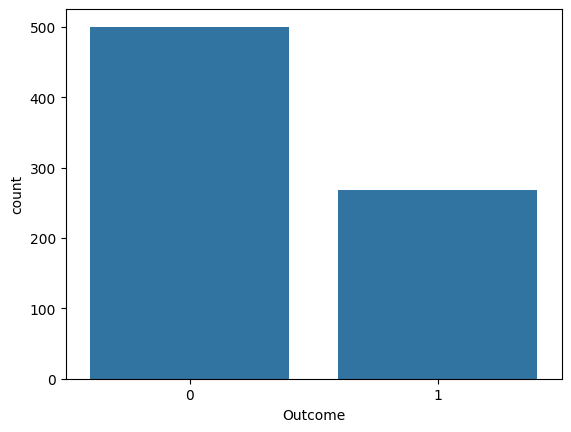

In [97]:
# Visualize distribution
sns.countplot(x='Outcome', data=df)
plt.show()

STATISTICAL DATA

In [98]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The presence of zeros in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI likely indicates missing or invalid values, as these measurements generally shouldn’t be zero. Here are a few approaches to handle these values:

1. Replace Zeros with NaN (Not a Number)
2. Impute Missing Values

In [99]:
import numpy as np

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


In [100]:
#Predictive Imputation:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[columns_to_replace] = imputer.fit_transform(df[columns_to_replace])


In [101]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


HERE IF WE OBSERVE WE HAVE MAX VALUE OF INSULIN IS GERATER IT SAYS ABOUT OUTLIERS NEED TO BE REMOVED

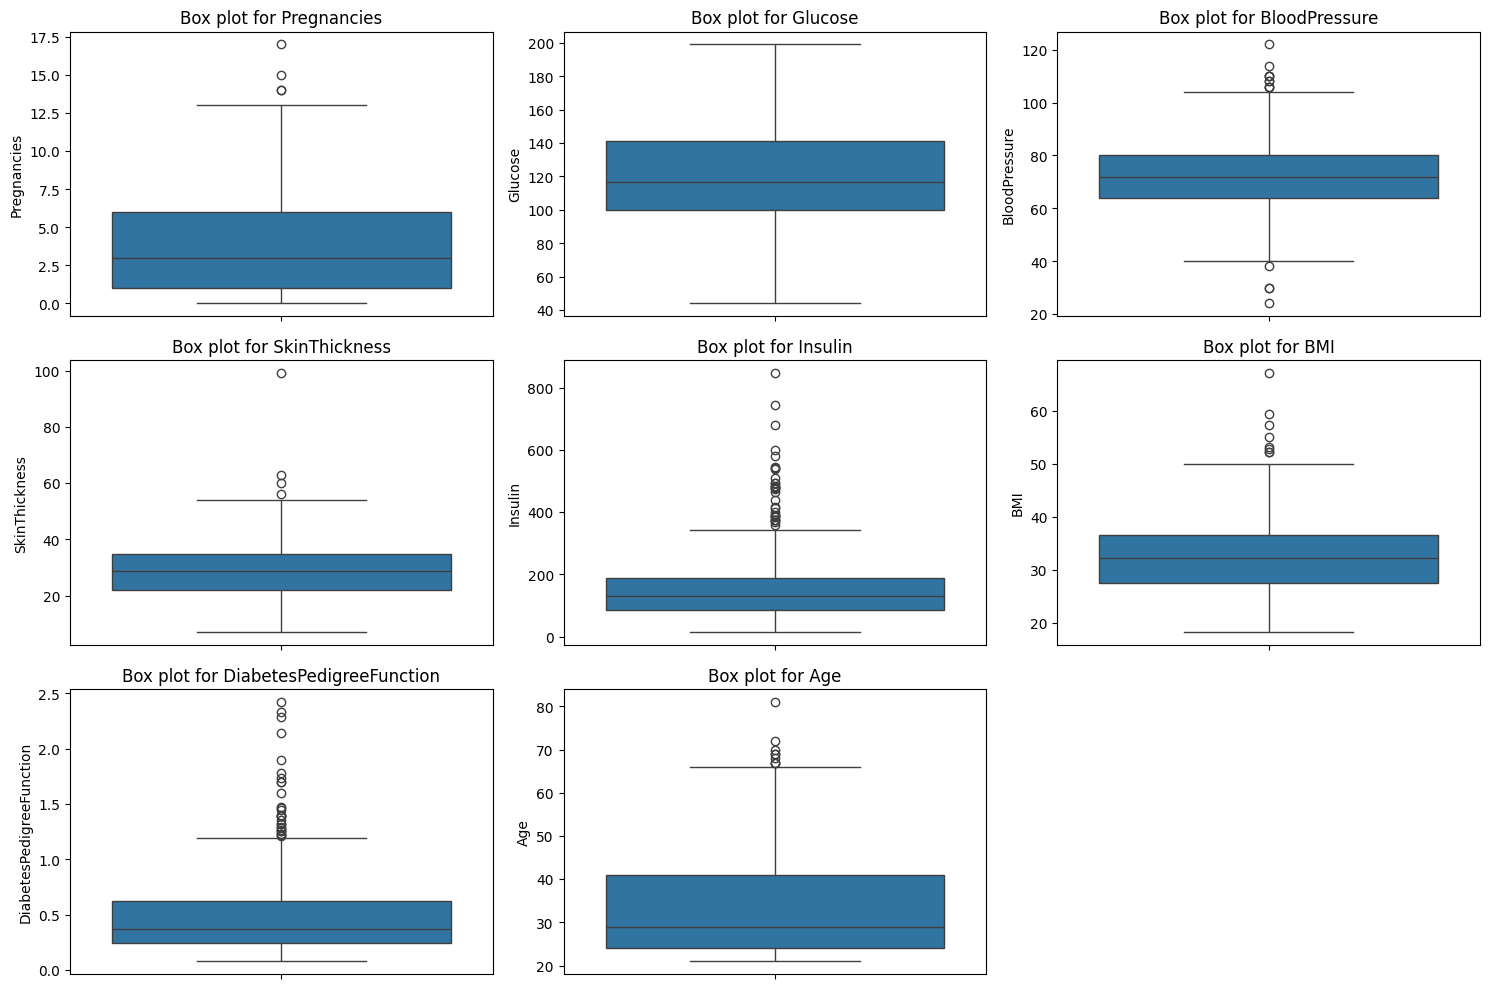

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot for {col}')
plt.tight_layout()
plt.show()


In [103]:
# Using IQR method to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


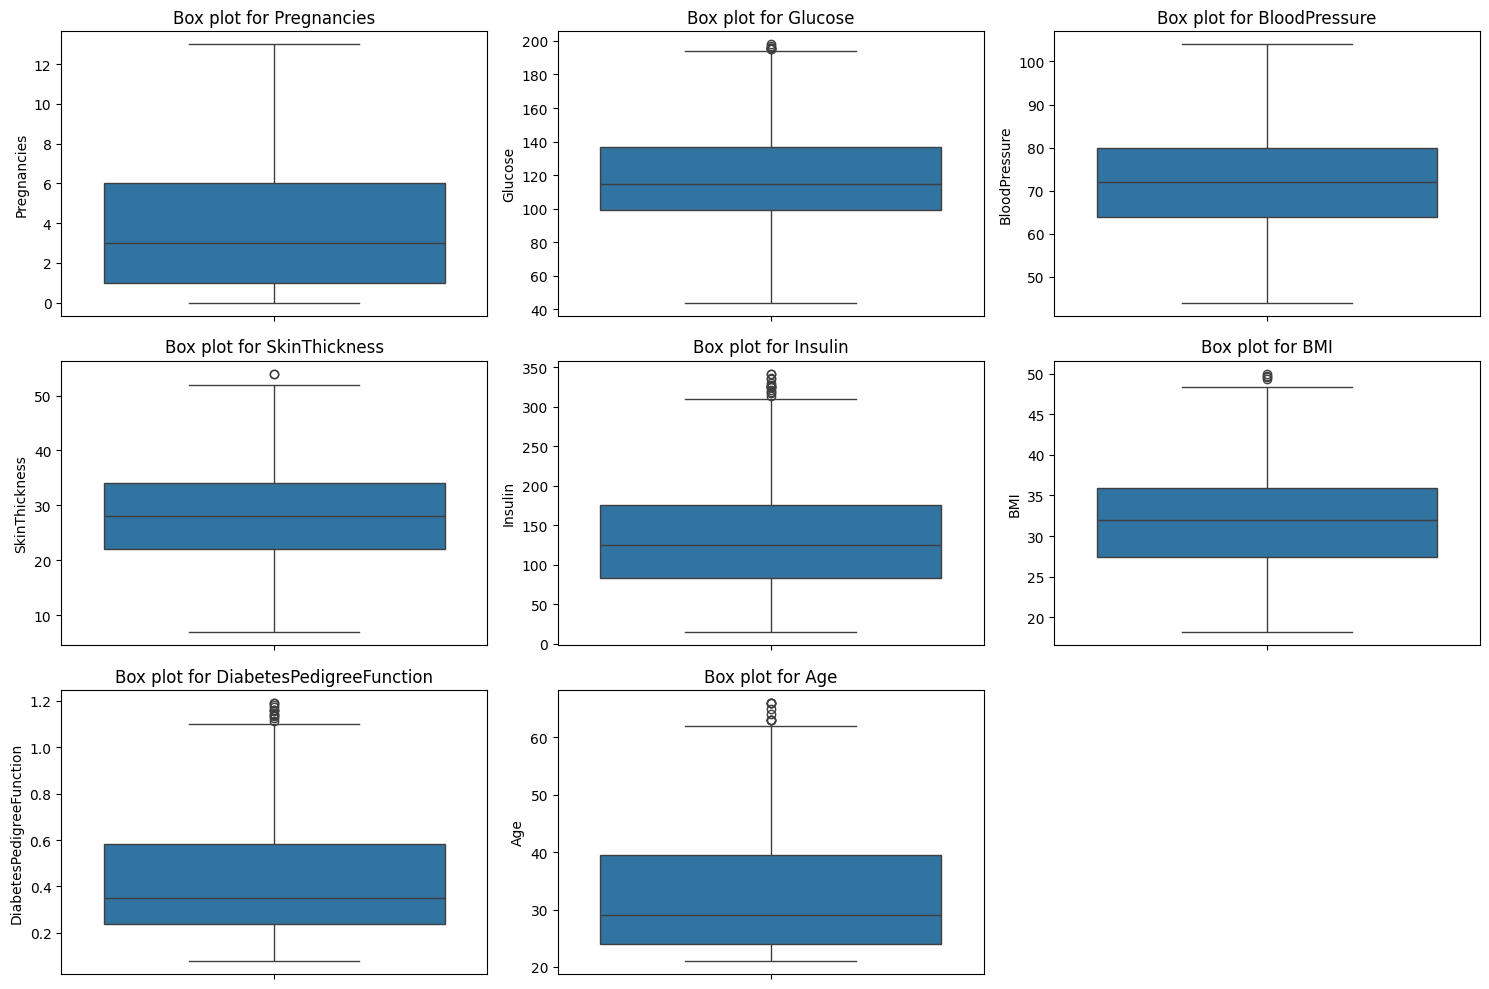

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot for {col}')
plt.tight_layout()
plt.show()


THE OUTLIERS ARE REMOVED

In [105]:
df.shape

(679, 9)

CORELATION MAPS

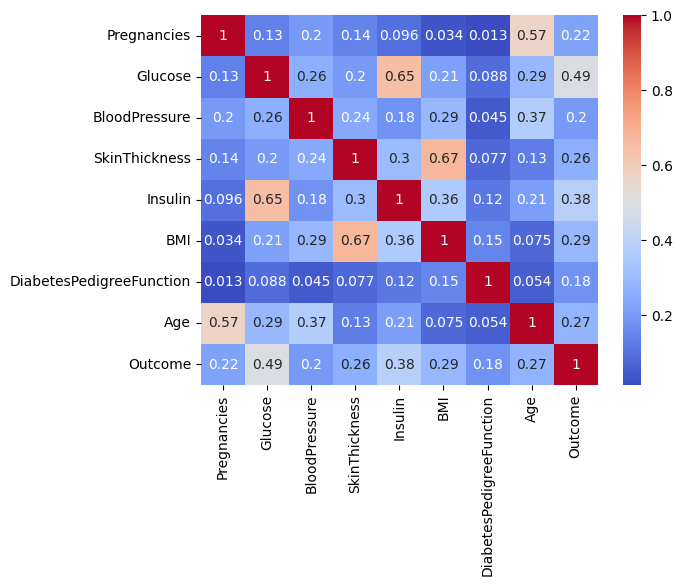

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


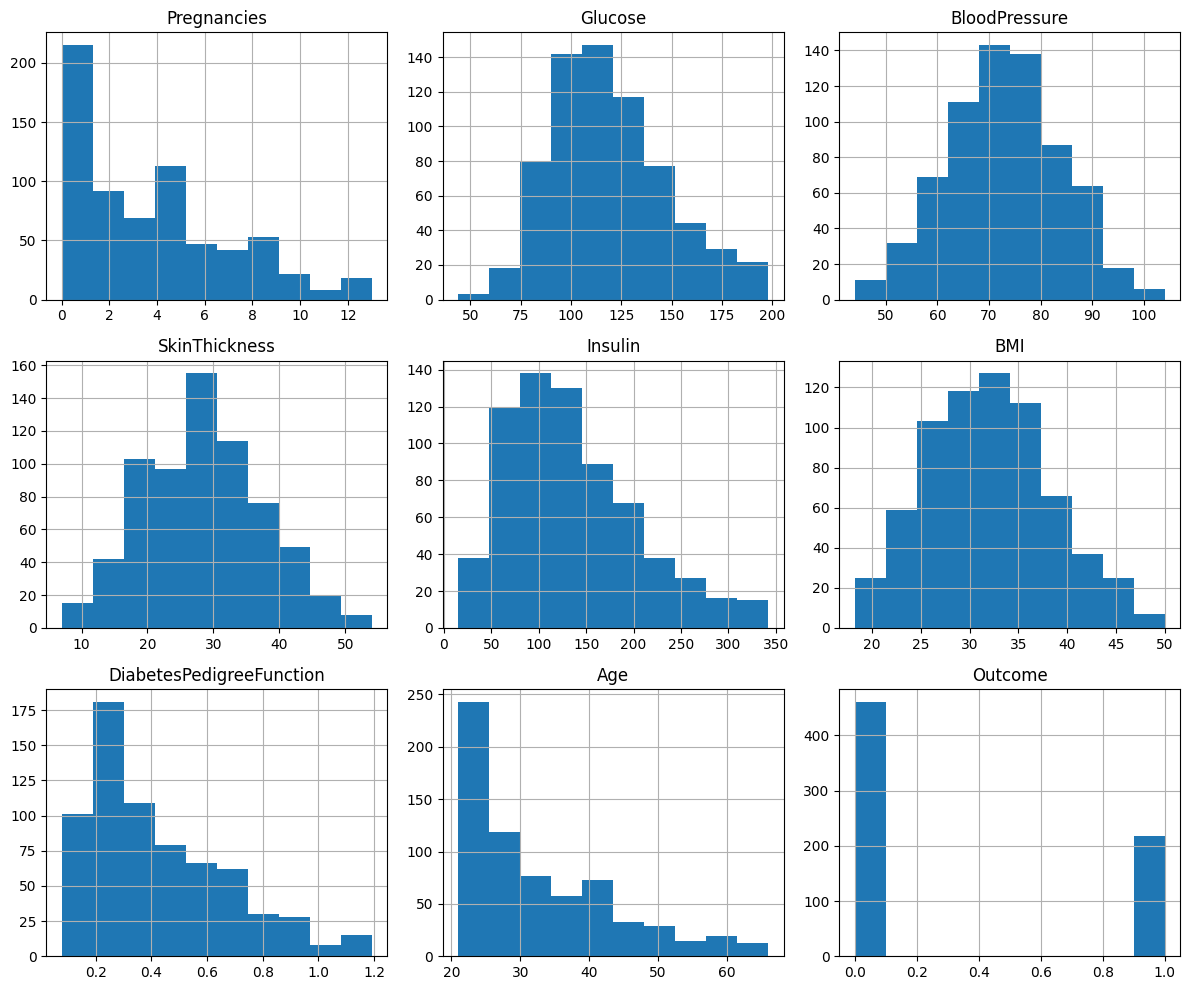

In [107]:
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()


In [70]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features (excluding the target variable)
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

# Convert back to DataFrame for further processing
df1 = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Exclude 'Outcome'
df1['Outcome'] = df['Outcome']  # Add the target variable back




In [71]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.682602,1.004554,-0.000888,0.750390,1.066400,0.251068,0.796047,1.602224,1.0
1,-0.855177,-1.187438,-0.549295,0.076458,-0.911992,-0.848955,-0.306256,-0.136529,0.0
2,-0.855177,-1.048264,-0.549295,-0.597473,-0.606505,-0.613236,-1.041125,-1.051662,NaN
3,0.375046,-0.108839,0.181914,-1.316333,-0.702515,-1.006101,-0.905334,-0.228042,0.0
4,-0.240066,-1.430993,-2.011713,0.413424,-0.693787,-0.157512,-0.717623,-0.594095,NaN


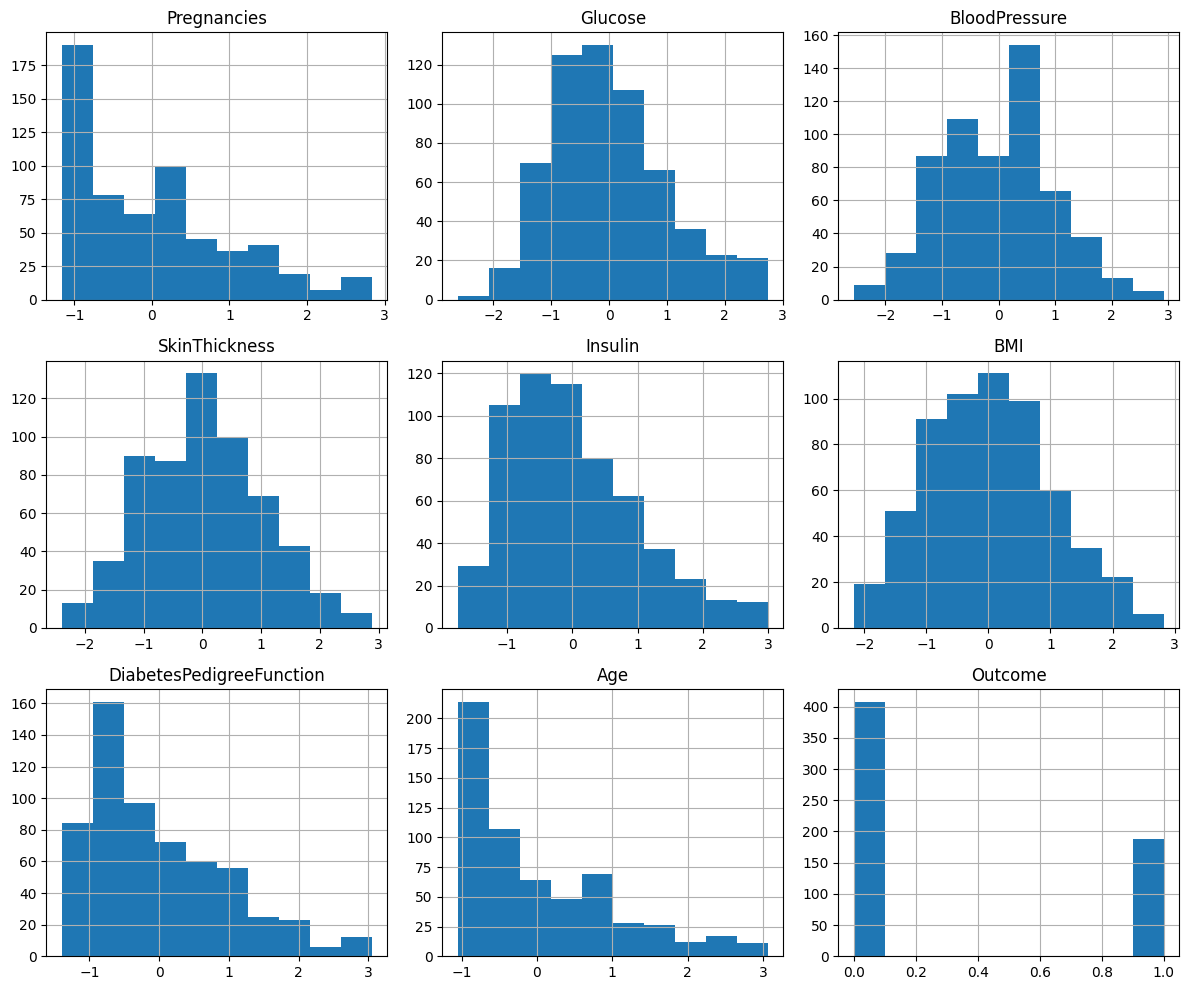

In [87]:
df1.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()


In [73]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,83


In [74]:
# Check the percentage of missing values
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentage)


Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     12.223859
dtype: float64


AS THE MISSING VALUE IS SMALL PERCENTAGE WE CAN DROP THOSE VALUES

In [75]:
# Drop rows with missing values in the 'Outcome' column
df1.dropna(subset=['Outcome'], inplace=True)


In [108]:
# Continue with your analysis or modeling
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [111]:



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=200)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[121  14]
 [ 32  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       135
           1       0.73      0.54      0.62        69

    accuracy                           0.77       204
   macro avg       0.76      0.72      0.73       204
weighted avg       0.77      0.77      0.76       204



In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.7745098039215687
Precision: 0.7254901960784313
Recall: 0.5362318840579711
F1 Score: 0.6166666666666667


In [116]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initialize the scaler and model
scaler = StandardScaler()
model = LogisticRegression(max_iter=200)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# List to store the F1 scores
f1_scores = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Use iloc to index by position
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Display the results
print("F1 Scores for each fold: ", f1_scores)
print("Mean F1 Score: ", np.mean(f1_scores))
print("Standard Deviation of F1 Scores: ", np.std(f1_scores))


F1 Scores for each fold:  [0.5454545454545454, 0.5569620253164557, 0.6153846153846154, 0.6410256410256411, 0.6027397260273972]
Mean F1 Score:  0.5923133106417309
Standard Deviation of F1 Scores:  0.03594257536900084


Interpretation
Mean F1 Score:

The mean F1 score of approximately 0.5923 indicates that your model has a balanced performance between precision and recall. This is a decent score, especially in the context of predicting diabetes, where you want to minimize false negatives.
Standard Deviation:

A standard deviation of around 0.0359 suggests that your model's performance is fairly consistent across the different folds. A low standard deviation is desirable as it indicates that your model's performance does not vary significantly with different subsets of the data.
